In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

In [8]:
dir_list = [item for item in os.listdir(os.getcwd()) if os.path.isdir(item)]
dir_list = ['50elefin_63']

50elefin_63


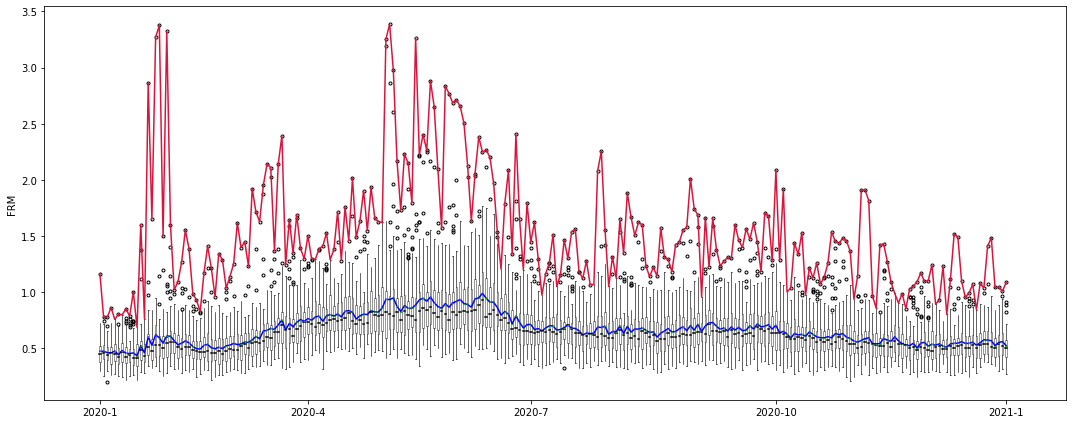

In [9]:
for dir_name in dir_list:
    #####

    folder = dir_name
    company = folder.split('_')[0]
    ncol_xx0 = int(folder.split('_')[0][:2])
    ws = int(folder.split('_')[1])

    #####

    print(folder)
    company_choose = {}
    company_choose['25ele'] = ['2330', '2317', '2454', '2382', '2412', '2308', '2303', '3711', '3045', '2395', '3231', '2301', '3008', '2345', '2357', '3037', '3034', '4904', '2327', '4938', '2408', '2379', '3661', '3443', '2376']
    company_choose['25fin'] = ['2881', '2882', '2886', '2891', '2884', '5880', '2892', '2885', '2880', '2887', '2890', '2883', '2801', '2888', '2834', '2812', '2838', '2845', '2809', '2889', '6005', '2855', '2897', '2867', '2849']
    company_choose['50cap'] = ['2330', '2317', '2454', '2382', '2412', '2308', '2881', '6505', '2882', '2303', '2886', '1303', '1301', '2891', '3711', '1216', '2002', '2884', '5880', '2207', '2892', '1326', '3045', '2885', '2395', '3231', '5871', '2301', '3008', '2880', '2345', '2912', '2357', '3037', '3034', '2603', '1101', '4904', '2887', '2327', '2890', '4938', '2408', '2379', '2883', '1590', '3661', '2801', '3443', '9910']
    company_choose['50elefin'] = ['2330', '2317', '2454', '2382', '2412', '2308', '2303', '3711', '3045', '2395', '3231', '2301', '3008', '2345', '2357', '3037', '3034', '4904', '2327', '4938', '2408', '2379', '3661', '3443', '2376', '2881', '2882', '2886', '2891', '2884', '5880', '2892', '2885', '2880', '2887', '2890', '2883', '2801', '2888', '2834', '2812', '2838', '2845', '2809', '2889', '6005', '2855', '2897', '2867', '2849']

    Taiwan = company_choose[company]


    data = pd.read_csv(f'../00 Raw Data/{company}.csv', parse_dates=['Date'], index_col='Date').rename_axis(None, axis=0)
    macro = pd.read_csv('../00 Raw Data/macro_return.csv', parse_dates=['Date'], index_col='Date').rename_axis(None, axis=0)

    xx0 = data.drop(columns=data.columns[0])
    xx0 = scale(xx0)

    m = macro.drop(columns=macro.columns[0])
    m = scale(m)

    # 計算22個lambda序列的平均值
    full_lambda = np.zeros((xx0.shape[0] - ws, ncol_xx0))

    for j in range(ncol_xx0):
        lambda_firm = pd.read_csv(f"../02 Modeling/{folder}/lambda_l_{j + 1}.csv")
        full_lambda[:, j] = lambda_firm.iloc[:, 1].to_numpy()

    full_lambda = pd.DataFrame(full_lambda)
    full_lambda.index = data.index[ws:]
    full_lambda.columns = Taiwan
    full_lambda = full_lambda[371-ws:616-ws]
    # full_lambda.to_csv(f'../02 Modeling/{folder}/full_lambda.csv')


    average_lambda = np.sum(full_lambda, axis=1) / xx0.shape[1]
    # average_lambda_df = pd.DataFrame({'FRM': average_lambda})

    period = data.index
    # average_lambda_df.index = period[ws:]
    # average_lambda_df = average_lambda_df[371:616]

    # 重新採樣full_lambda的數據，保持每日的頻率
    full_lambda_daily = full_lambda.copy()

    # 設置圖形的大小
    plt.figure(figsize=(15, 6))

    # 繪製boxplot
    sns.boxplot(data=full_lambda_daily.T, width=0.4, linewidth=0.6, whis=1.5,
        meanline=True, showmeans=True, 
        boxprops=dict(facecolor='none', linewidth=0.5, edgecolor='black', alpha=0.8), 
        flierprops=dict(marker='o', markersize=3, linewidth=0.25, markerfacecolor='none', markeredgecolor='black'),
        medianprops=dict(linewidth=1.5, color='black'),
        whiskerprops=dict(linestyle='-', color='black'),
        capprops=dict(color='black'))

    # 繪製每天的max值的紅色線
    plt.plot(full_lambda_daily.max(axis=1).values, color='crimson', label='Max Value', linewidth=1.5)

    # 繪製mean的藍色線
    plt.plot(full_lambda_daily.mean(axis=1).values, color='blue', label='Mean Value', linewidth=1.5)

    # 設置圖形的標題和軸標籤
    plt.ylabel("FRM")
    
    full_lambda_monthly = full_lambda.resample('M').mean()
    all_dates = [item.strftime('%Y-%m') for item in full_lambda_monthly.index]

    xtick_indices = [full_lambda_daily.index.get_loc(d) for d in 
                    ["2020-01-02", "2020-04-01", "2020-07-01", "2020-10-05", "2020-12-31"]]
    xtick_labels = ['2020-1', '2020-4', '2020-7', '2020-10', '2021-1']

    # 設置x軸的刻度和標籤
    yearly_ticks = [i for i, date in enumerate(all_dates) if date[5:7] == '01' and date[8:10] == '01']

    # 設置x軸的範圍，從而在最左邊和最右邊留下一些空白
    padding = 15  # 設置要留下的空白的天數
    plt.xlim(-padding, len(full_lambda_daily) + padding)
    plt.xticks(ticks=xtick_indices, labels=xtick_labels)

    # 顯示圖形
    plt.tight_layout()  # 確保所有的標籤都可見
    plt.savefig(f'{folder}/Daily_Lambdas_Boxplot_{company}_partial.png', transparent=True, dpi=144)
    plt.show()


In [27]:
print(full_lambda[10:40].max(axis=1))

2020-01-16    0.686510
2020-01-17    1.602577
2020-01-20    0.759693
2020-01-30    2.858647
2020-01-31    1.652580
2020-02-03    3.270927
2020-02-04    3.374459
2020-02-05    1.498168
2020-02-06    3.323080
2020-02-07    1.597633
2020-02-10    1.021939
2020-02-11    1.090633
2020-02-12    1.268003
2020-02-13    1.551524
2020-02-14    1.386374
2020-02-17    0.987573
2020-02-18    0.931027
2020-02-19    0.828552
2020-02-20    1.167952
2020-02-21    1.409463
2020-02-24    1.214363
2020-02-25    0.960214
2020-02-26    1.344555
2020-02-27    1.288484
2020-03-02    1.036928
2020-03-03    1.138827
2020-03-04    1.252601
2020-03-05    1.616735
2020-03-06    1.397240
2020-03-09    1.448183
dtype: float64


In [25]:
full_lambda.loc['2020-02-04'].sort_values()

2897    0.301731
2376    0.313437
2330    0.325713
3034    0.344049
2379    0.351219
4904    0.354422
2327    0.359633
3661    0.388076
2454    0.397561
3037    0.404558
2809    0.413744
2892    0.415233
3443    0.427350
2855    0.450710
2412    0.458173
2890    0.479385
2308    0.481945
2317    0.482659
3008    0.489349
2408    0.496399
2889    0.504655
2345    0.507073
2357    0.513619
2886    0.525475
3045    0.527142
5880    0.529589
3231    0.541876
2883    0.542837
2884    0.546931
2303    0.548692
2395    0.554024
2301    0.563790
2888    0.570070
3711    0.571153
2382    0.586166
6005    0.591620
2880    0.603605
2849    0.618859
2834    0.642994
2812    0.648461
2845    0.650200
2838    0.652538
2881    0.683009
2882    0.694944
2891    0.718524
2867    0.757121
2801    0.765015
2885    0.892361
2887    1.148931
4938    3.374459
Name: 2020-02-04 00:00:00, dtype: float64